In [1]:
# print("hello123")
# import os
# import pandas as pd
# #pwd
# fn="C:\\Users\\KAJAL\\ml-PricePrediction\\sheet.xlsx"
# #fna="‪C:\Users\KAJAL\ml-PricePrediction\sheet.xlsx"
# os.path.exists(fn)
# # vari=pd.read_csv("C:\\Users\\KAJAL\\ml-PricePrediction\\data.csv.xlsx", encoding= 'unicode_escape')
# # vari.head()
# #C:\Users\KAJAL\ml-PricePrediction\data.csv.xlsx

## Dragon Real Estate Price Predictor

In [2]:
#pwd
# error_bad_lines=False
# variable = pd.read_csv("C:\\Users\\KAJAL\\ml-PricePrediction\\sheet.xlsx",encoding =('ISO-8859-1'),low_memory =False,)


In [3]:
# import pandas as pd
# data = pd.read_csv("C:\Users\KAJAL\ml-PricePrediction\sheet.xlsx", encoding='latin-1', error_bad_lines=False)
# data.head()

In [4]:
# import pandas as pd
# data = open("C:\Users\KAJAL\ml-PricePrediction\housing.data")


In [5]:
# import os
# import pandas as pd
# #pwd
# fn="C:\\Users\\KAJAL\\ml-PricePrediction\\sheet.xlsx"
# #fna="‪C:\Users\KAJAL\ml-PricePrediction\sheet.xlsx"
# os.path.exists(fn)
# vari=pd.read_csv("C:\\Users\\KAJAL\\ml-PricePrediction\\sheet.xlsx", encoding= 'ISO-8859-1')
# vari.head()


In [6]:
# For knowing the dataset 
import sklearn
import pandas as pd
housing = pd.read_csv("book1.csv")
housing.head()
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       503 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      504 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
# housing['CHAS'].value_counts()
# housing['MEDV'].value_counts() 

In [8]:
# housing.describe()

In [1]:
%matplotlib inline

In [10]:
# # For Histogram purpose
# import matplotlib.pyplot as plt
# housing.hist(bins=50, figsize=(20,15))

# Train - Test Splitting

In [11]:
# #For learning purpose
# import numpy as np
# def split_train_test(data, test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     print(shuffled)
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
# train_set, test_set = split_train_test(housing, 0.2)

In [13]:
# # print(f"{len(train_set)}")
# print(f"Row in Train set : {len(train_set)}\n Row in test set: {len(test_set)}\n")

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Row in Train set : {len(train_set)}\nRow in test set: {len(test_set)}\n")


Row in Train set : 404
Row in test set: 102



In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [16]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [17]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [18]:
# 95/7

In [19]:
# 376/28

In [20]:
housing = strat_train_set.copy()

# Looking for Correlations


In [21]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.678577
B          0.361761
ZN         0.339741
DIS        0.238345
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [22]:
# from pandas.plotting import scatter_matrix
# attributes = ["MEDV","RM","ZN","LSTAT"]
# scatter_matrix(housing[attributes], figsize = (12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

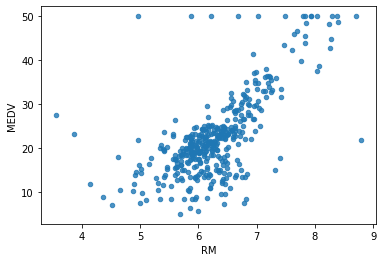

In [23]:
housing.plot(kind="scatter", x="RM",y="MEDV", alpha=0.8)

## trying out attribute combination


In [24]:
housing["TAXRM"] = housing['TAX']/housing['RM']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [25]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.678577
B          0.361761
ZN         0.339741
DIS        0.238345
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.523539
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

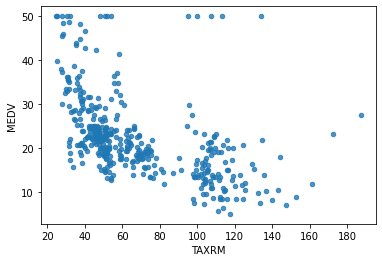

In [26]:
housing.plot(kind="scatter", x="TAXRM",y="MEDV", alpha=0.8)

In [27]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing attributes

In [28]:
# To take care of missing attributes, you have three option:
#     1. Get rid of the missing data points
#     2. get rid of the missing attributes
#     3. get the value to some value(0,mean or median)

In [29]:
a = housing.dropna(subset=["RM"]) #option = 1
a.shape


(403, 13)

In [30]:
housing.drop("RM", axis= 1).shape  #option 2

(404, 12)

In [31]:
# median
median = housing["RM"].median()    #compute median for option 3


In [32]:
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [33]:
housing.median()

CRIM         0.286735
ZN           0.000000
INDUS        9.900000
CHAS         0.000000
NOX          0.538000
RM           6.209000
AGE         78.200000
DIS          3.132300
RAD          5.000000
TAX        337.000000
PTRATIO     19.000000
B          390.955000
LSTAT       11.570000
dtype: float64

In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= "median")
imputer.fit(housing)



SimpleImputer(strategy='median')

In [35]:
imputer.statistics_.shape

(13,)

In [36]:
X = imputer.transform(housing)

In [37]:
housing_tr=pd.DataFrame(X,columns=housing.columns)

In [38]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.277493,69.039851,3.749906,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711561,28.258248,2.096651,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.044600,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.132300,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design


 Primarily 3 type of objects

 1. Estimators = It estimates some parameter based on dataset . Eg : Estimate

 2. Transformers - Transform method takes input and return output based on the learning from fit()
     
 3. Predictors -  LinearRegression model is an example of predictor . Fit() and predict() are two common function


## Feature Scaling

Primarily two type of feature scalling methods:
1. Min-max scaling(Normalization )
            (value-min)/(max-min)
            sklearn provide a class called minMaxScaler for this
            
2. Standardization 
           (value-mean)/std
           sklearn provide a class called standard Scaler for this



# Creating a Pipeline

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    #    ..... add as mamy you want in youe pipeline
    ('std_scaler',StandardScaler()),
    
])


In [40]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [41]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

## Selecting a desire model for Dragon Real Estates

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# model = LinearRegression()
# model= DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [43]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([22.084, 25.668, 16.686, 23.346, 23.419])

In [44]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluation the model

In [45]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)

In [46]:
rmse

1.2499449829476643

## Using better evaluation technique - Cross Validation

In [47]:
# 1 2 3 4 5 6 7 8 9
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores


array([2.76633236, 2.92380323, 4.4690164 , 2.59922854, 3.32301009,
       2.6970951 , 4.4136118 , 3.46163817, 3.17787703, 3.09679314])

In [48]:
def print_scores(scores):
    print("Scores: ",scores)
    print("Mean: ",scores.mean())
    print("standard deviation: ",scores.std())
    

In [49]:
print_scores(rmse_scores)

Scores:  [2.76633236 2.92380323 4.4690164  2.59922854 3.32301009 2.6970951
 4.4136118  3.46163817 3.17787703 3.09679314]
Mean:  3.2928405861576797
standard deviation:  0.6300778960314198


## saving the model

In [50]:
from joblib import dump,load
dump(model,'Dragon.joblib')

['Dragon.joblib']

## Testing the data

In [51]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions,list(Y_test))

In [52]:
final_rmse

2.8887011363071036

In [53]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23849361, -1.31238772,  2.61234579, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])